# TOPSIS - Entropy

It is a multi-criteria decision analysis method that is based on the concept that the chosen alternative should have the shortest geometric distance to the Positive Ideal Solution (PIS) and the longest geometric solution from the Negative Ideal Solution (NIS).

In [1]:
# All the packages that we need to import
import numpy as np               
import pandas as pd              

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

### so that you dont have warnings prompt
from warnings import filterwarnings
filterwarnings('ignore')

## Pre-requisites

For this problem, we are always provided with the following data:
1. The values for each category needs to be considered.
2. The weights for every category or attribute to be considered.

Note that an attribute can be beneficial attribute (in which case, we will want to maximize it's contribution) or a cost attribute (which we will need to minimize). We call the set of beneficial attributes $J_1$ and that of cost attributes $J_2 = J_1^C$.

In [2]:
df=pd.read_csv(r"C:\Users\Praujjawal\Desktop\BTP I Materials\Actual Data\2019_FINAL_DATA.csv")
shp= gpd.read_file(r"C:\Users\Praujjawal\Downloads\Shape Files\India States\Indian_states.shx")

In [3]:
df

,States/UTs,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2019,Share of States/UTs in Total Number of Persons Injured in Road Accidents - 2019,Total Number of Persons Injured in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Injured in Road Accidents per 10,000 Vehicles - 2019",State/UT-wise Total Number of Persons Killed in Road Accidents during - 2019,Share of States/UTs in Total Number of Persons Killed in Road Accidents - 2019,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2019",People killed with Permanent DL in 2019,...,Number of people killed in 2019 by pedestrian accident impact,Number of people killed in 2019 by bicycle accident impact,Number of people killed in 2019 by motorised 2 wheeler accident impact,Number of people killed in 2019 by autorickshaw accident impact,Number of people killed in 2019 by LMV accident impact,Number of people killed in 2019 by Trucks/ Lorries accident impact,Number of people killed in 2019 by Buses accident impact,Number of people killed in 2019 by other vehicles accident impact,Number of people killed in 2019 due to absence of helmet,Number of people killed in 2019 due to absence of seat belt
0,Andhra Pradesh,24619,5.5,27.3,20.5,7984,5.3,8.8,6.7,15303,...,1723,94,3352,572,703,629,213,698,2636,711
1,Arunachal Pradesh,309,0.1,22.8,13.4,127,0.1,9.4,5.5,63,...,8,0,26,6,27,9,4,47,25,18
2,Assam,7473,1.7,22.3,19.0,3208,2.1,9.6,8.1,7037,...,718,106,1031,127,528,241,153,304,440,253
3,Bihar,7206,1.6,6.7,8.4,7205,4.8,6.7,8.4,8373,...,1259,419,3135,440,932,243,131,646,525,76
4,Chhattisgarh,13090,2.9,48.9,20.5,5003,3.3,18.7,7.8,8395,...,578,173,2894,51,413,274,71,549,2618,701
5,Goa,1448,0.3,68.4,10.3,297,0.2,14.0,2.1,3337,...,50,2,186,1,16,4,8,30,147,24
6,Gujarat,16258,3.6,25.1,6.5,7390,4.9,11.4,2.9,11936,...,1291,84,2755,375,1381,817,200,487,2013,1447
7,Haryana,9362,2.1,32.7,10.9,5057,3.3,17.7,5.9,3922,...,1673,103,1614,99,589,320,135,524,554,478
8,Himachal Pradesh,4904,1.1,67.6,30.0,1146,0.8,15.8,7.0,1807,...,192,5,288,2,469,59,81,50,239,634
9,Jammu & Kashmir,7532,1.7,58.9,40.6,996,0.7,7.8,5.4,4863,...,88,7,171,14,246,138,108,224,19,35


In [4]:
#Dropping the columns "share of states/UTs" as it has corr=1 with respectively previous columns

dropped= df.columns[[2,6]]
df= df.iloc[:, ~df.columns.isin(dropped)]

In [5]:
sd= df.select_dtypes(exclude=['object'])


In [9]:
desscr= pd.DataFrame(df.describe())

In [12]:
desscr.to_csv(r'C:\Users\Praujjawal\Desktop\BTP I Materials\Actual Data\Statistical Analysis.csv',index=True)

In [6]:
col= sd.columns
states= df.iloc[:,0]

## Normalizing the decision matrix

$$r_{ij}=\frac{x_{ij}}{\sqrt{\sum_{i = 1}^{m} x_{ij}^2}}$$

where $i = 1, 2, \ldots, m$ and $j = 1, 2, \ldots, n$.

In [7]:
m = len(sd.index)
n = len(sd.columns)
divisors = np.empty(n)
for j in range(n):
    column = sd.iloc[:,j]
    divisors[j] = np.sqrt(column @ column)

sd /= divisors

sd= pd.DataFrame(data=sd, columns=sd.columns)
DF = pd.merge(states,sd, left_index=True, right_index=True)
DF

,States/UTs,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2019,Total Number of Persons Injured in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Injured in Road Accidents per 10,000 Vehicles - 2019",State/UT-wise Total Number of Persons Killed in Road Accidents during - 2019,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2019",People killed with Permanent DL in 2019,People killed with LL in 2019,People killed without any license in 2019,Number of people killed in 2019 by pedestrian accident impact,Number of people killed in 2019 by bicycle accident impact,Number of people killed in 2019 by motorised 2 wheeler accident impact,Number of people killed in 2019 by autorickshaw accident impact,Number of people killed in 2019 by LMV accident impact,Number of people killed in 2019 by Trucks/ Lorries accident impact,Number of people killed in 2019 by Buses accident impact,Number of people killed in 2019 by other vehicles accident impact,Number of people killed in 2019 due to absence of helmet,Number of people killed in 2019 due to absence of seat belt
0,Andhra Pradesh,0.193221,0.101167,0.180086,0.203174,0.136076,0.209544,0.170510,0.159292,0.175414,0.262723,0.061309,0.231938,0.276396,0.103054,0.157907,0.099075,0.149743,0.208067,0.105402
1,Arunachal Pradesh,0.002425,0.084491,0.117715,0.003232,0.145353,0.172014,0.000702,0.006311,0.003541,0.001220,0.000000,0.001799,0.002899,0.003958,0.002259,0.001861,0.010083,0.001973,0.002668
2,Assam,0.058651,0.082638,0.166909,0.081636,0.148446,0.253329,0.078408,0.080782,0.025127,0.109481,0.069135,0.071339,0.061368,0.077400,0.060502,0.071166,0.065218,0.034731,0.037506
3,Bihar,0.056556,0.024828,0.073791,0.183351,0.103603,0.262712,0.093294,0.103881,0.008852,0.191972,0.273280,0.216923,0.212613,0.136623,0.061004,0.060933,0.138587,0.041440,0.011267
4,Chhattisgarh,0.102736,0.181211,0.180086,0.127315,0.289161,0.243947,0.093539,0.108172,0.120052,0.088133,0.112834,0.200247,0.024644,0.060542,0.068786,0.033025,0.117778,0.206647,0.103919
5,Goa,0.011365,0.253473,0.090482,0.007558,0.216484,0.065678,0.037182,0.000505,0.005039,0.007624,0.001304,0.012870,0.000483,0.002345,0.001004,0.003721,0.006436,0.011603,0.003558
6,Gujarat,0.127600,0.093014,0.057101,0.188058,0.176280,0.090698,0.132994,0.135057,0.084779,0.196852,0.054786,0.190629,0.181204,0.202443,0.205104,0.093028,0.104477,0.158892,0.214510
7,Haryana,0.073477,0.121178,0.095753,0.128689,0.273698,0.184524,0.043700,0.029031,0.022267,0.255099,0.067179,0.111679,0.047838,0.086342,0.080334,0.062794,0.112414,0.043729,0.070861
8,Himachal Pradesh,0.038489,0.250508,0.263541,0.029163,0.244318,0.218926,0.020134,0.002524,0.053387,0.029276,0.003261,0.019928,0.000966,0.068751,0.014812,0.037676,0.010727,0.018865,0.093987
9,Jammu & Kashmir,0.059114,0.218268,0.356659,0.025346,0.120612,0.168886,0.054185,0.004796,0.001226,0.013418,0.004566,0.011832,0.006765,0.036062,0.034644,0.050235,0.048055,0.001500,0.005189


In [8]:
sd_et=sd

# Entropy Weights Calculation

In [9]:
m = len(sd_et.index)
n = len(sd_et.columns)
Pj = np.empty(n)
for j in range(n):
    column = sd_et.iloc[:,j]
    Pj[j] = np.sum(column)

sd_et /= Pj

Ej = np.empty(n)
for j in range(n):
    column = sd_et.iloc[:,j]
    Ej[j] = np.sum(column * np.log(column))*(-1/np.log(m))
W_dem= np.sum(1-Ej)

weights = np.empty(n)
for i in range(n):
    weights[i]=(1-Ej[i])/W_dem
    
weights
#Below printed is the weight vector obtained by Entropy weighting method

array([0.05709197, 0.02203658, 0.01859839, 0.04946829, 0.00892203,
       0.01226854, 0.05673909, 0.07381978, 0.07369466, 0.04843509,
       0.0743513 , 0.05074067, 0.06658906, 0.0585557 , 0.0630106 ,
       0.07164587, 0.06424563, 0.06109828, 0.06868846])

## Calculating the Weighted Normalized Ratings

$$v_{ij} = w_j r_{ij}$$

where $i = 1, 2, \ldots, m$ and $j = 1, 2, \ldots, n$.

In [10]:
sd_et *= weights

In [11]:
sd_et

,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2019,Total Number of Persons Injured in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Injured in Road Accidents per 10,000 Vehicles - 2019",State/UT-wise Total Number of Persons Killed in Road Accidents during - 2019,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2019",People killed with Permanent DL in 2019,People killed with LL in 2019,People killed without any license in 2019,Number of people killed in 2019 by pedestrian accident impact,Number of people killed in 2019 by bicycle accident impact,Number of people killed in 2019 by motorised 2 wheeler accident impact,Number of people killed in 2019 by autorickshaw accident impact,Number of people killed in 2019 by LMV accident impact,Number of people killed in 2019 by Trucks/ Lorries accident impact,Number of people killed in 2019 by Buses accident impact,Number of people killed in 2019 by other vehicles accident impact,Number of people killed in 2019 due to absence of helmet,Number of people killed in 2019 due to absence of seat belt
0,3.114020e-03,0.000482,0.000694,0.002614,0.000223,0.000487,2.681585e-03,0.004195,0.004280,0.003227,0.001666,0.003030,0.005723,0.001722,0.002929,0.002337,0.003134,0.003606,0.002338
1,3.908494e-05,0.000403,0.000454,0.000042,0.000238,0.000400,1.103965e-05,0.000166,0.000086,0.000015,0.000000,0.000024,0.000060,0.000066,0.000042,0.000044,0.000211,0.000034,0.000059
2,9.452484e-04,0.000394,0.000643,0.001050,0.000243,0.000589,1.233112e-03,0.002127,0.000613,0.001345,0.001878,0.000932,0.001271,0.001294,0.001122,0.001679,0.001365,0.000602,0.000832
3,9.114760e-04,0.000118,0.000284,0.002359,0.000170,0.000611,1.467223e-03,0.002736,0.000216,0.002358,0.007424,0.002834,0.004403,0.002283,0.001132,0.001438,0.002901,0.000718,0.000250
4,1.655734e-03,0.000864,0.000694,0.001638,0.000473,0.000567,1.471078e-03,0.002849,0.002929,0.001083,0.003065,0.002616,0.000510,0.001012,0.001276,0.000779,0.002465,0.003581,0.002306
5,1.831553e-04,0.001208,0.000349,0.000097,0.000354,0.000153,5.847512e-04,0.000013,0.000123,0.000094,0.000035,0.000168,0.000010,0.000039,0.000019,0.000088,0.000135,0.000201,0.000079
6,2.056450e-03,0.000443,0.000220,0.002419,0.000288,0.000211,2.091576e-03,0.003557,0.002068,0.002418,0.001488,0.002490,0.003752,0.003383,0.003804,0.002195,0.002187,0.002754,0.004759
7,1.184185e-03,0.000578,0.000369,0.001655,0.000448,0.000429,6.872623e-04,0.000764,0.000543,0.003134,0.001825,0.001459,0.000991,0.001443,0.001490,0.001481,0.002353,0.000758,0.001572
8,6.202995e-04,0.001194,0.001016,0.000375,0.000400,0.000509,3.166453e-04,0.000066,0.001303,0.000360,0.000089,0.000260,0.000020,0.001149,0.000275,0.000889,0.000225,0.000327,0.002085
9,9.527112e-04,0.001040,0.001374,0.000326,0.000197,0.000393,8.521562e-04,0.000126,0.000030,0.000165,0.000124,0.000155,0.000140,0.000603,0.000643,0.001185,0.001006,0.000026,0.000115


## Identifying PIS ($A^*$) and NIS ($A^-$)

$$
\begin{align}
A^* &= \left\{v_1^*, v_2^*, \ldots, v_n^*\right\} \\
A^- &= \left\{v_1^-, v_2^-, \ldots, v_n^-\right\} \\
\end{align}
$$

And we define

$$
\begin{align}
v_j^* &=
\begin{cases}
\max{(v_{ij})}, \text{ if} j \in J_1 \\
\min{(v_{ij})}, \text{ if} j \in J_2
\end{cases}
\\
v_j^- &=
\begin{cases}
\min{(v_{ij})}, \text{ if} j \in J_1 \\
\max{(v_{ij})}, \text{ if} j \in J_2
\end{cases}
\\
\end{align}
$$

where $i = 1, 2, \ldots, m$ and $j = 1, 2, \ldots, n$.

In [12]:
a_pos = np.zeros(n)
a_neg = np.zeros(n)
for j in range(n):
    column = sd_et.iloc[:,j]
    max_val = np.max(column)
    min_val = np.min(column)
    
    # Since all the attributes are to be minimized, so the value with minimum cost is considererd for PIS.
    a_pos[j] = min_val
    a_neg[j] = max_val

pd.DataFrame(data=[a_pos, a_neg], index=["$A^*$", "$A^-$"], columns=sd_et.columns)

,State/UT-wise Total Number of Persons Injured in Road Accidents during - 2019,Total Number of Persons Injured in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Injured in Road Accidents per 10,000 Vehicles - 2019",State/UT-wise Total Number of Persons Killed in Road Accidents during - 2019,Total Number of Persons Killed in Road Accidents Per Lakh Population - 2019,"Total Number of Persons Killed in Road Accidents per 10,000 Vehicles - 2019",People killed with Permanent DL in 2019,People killed with LL in 2019,People killed without any license in 2019,Number of people killed in 2019 by pedestrian accident impact,Number of people killed in 2019 by bicycle accident impact,Number of people killed in 2019 by motorised 2 wheeler accident impact,Number of people killed in 2019 by autorickshaw accident impact,Number of people killed in 2019 by LMV accident impact,Number of people killed in 2019 by Trucks/ Lorries accident impact,Number of people killed in 2019 by Buses accident impact,Number of people killed in 2019 by other vehicles accident impact,Number of people killed in 2019 due to absence of helmet,Number of people killed in 2019 due to absence of seat belt
$A^*$,1.264885e-07,0.000021,0.00002,0.000000,0.000000,0.000000,1.752326e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
$A^-$,8.492057e-03,0.002245,0.00150,0.007416,0.000473,0.000742,7.504687e-03,0.022077,0.015748,0.005494,0.023337,0.006265,0.015389,0.009136,0.010198,0.015396,0.016952,0.009642,0.016037


## Calculating Separation Measures and Similarities to PIS

The separation or distance between the alternatives can be measured by the $n$-dimensional Euclidean distance. The separation from the PIS $A^*$ and NIS $A^-$ are $S^*$ and $S^-$ respectively.

$$
\begin{align}
S_i^* &= \sqrt{\sum_{j = 1}^n \left(v_{ij} - v^*_j\right)^2} \\
S_i^- &= \sqrt{\sum_{j = 1}^n \left(v_{ij} - v^-_j\right)^2} \\
\end{align}
$$

where $i = 1, 2, \ldots, m$ and $j = 1, 2, \ldots, n$.

We also calculate

$$
C^*_i = \frac{S_i^-}{S_i^* + S_i^-},\text{ where }i = 1, 2, \ldots, m
$$

In [13]:
sp = np.zeros(m)
sn = np.zeros(m)
cs = np.zeros(m)

for i in range(m):
    diff_pos = sd_et.iloc[i,:] - a_pos
    diff_neg = sd_et.iloc[i,:] - a_neg
    sp[i] = np.sqrt(diff_pos @ diff_pos)
    sn[i] = np.sqrt(diff_neg @ diff_neg)
    cs[i] = sn[i] / (sp[i] + sn[i])

ETScore= pd.DataFrame(data=zip(states,sp, sn, cs), columns=["States/UTs","$S^*$", "$S^-$", "Score"])

In [14]:
ETScore

,States/UTs,$S^*$,$S^-$,Score
0,Andhra Pradesh,0.012689,0.042455,0.769893
1,Arunachal Pradesh,0.000806,0.053005,0.985017
2,Assam,0.005083,0.048595,0.905300
3,Bihar,0.011055,0.044573,0.801271
4,Chhattisgarh,0.008434,0.045963,0.844951
5,Goa,0.001476,0.052889,0.972851
6,Gujarat,0.011217,0.043685,0.795690
7,Haryana,0.006136,0.048490,0.887672
8,Himachal Pradesh,0.003465,0.051291,0.936715
9,Jammu & Kashmir,0.002849,0.051820,0.947893


In [15]:
# ETScore.to_csv(r'C:\Users\Praujjawal\Desktop\BTP I Materials\Actual Data\Entropy_Topsis_2019.csv',index=False)

In [16]:
ETScore.loc[ETScore["States/UTs"]=="Dadra & Nagar Haveli","States/UTs"]="Dadara & Nagar Havelli"
ETScore.loc[ETScore["States/UTs"]=="Arunachal Pradesh","States/UTs"]="Arunanchal Pradesh"
ETScore.loc[ETScore["States/UTs"]=="Andaman & Nicobar Islands","States/UTs"]="Andaman & Nicobar Island"
ETScore.loc[ETScore["States/UTs"]=="Delhi","States/UTs"]="NCT of Delhi"

In [17]:
merged_ET = shp.set_index('st_nm').join(ETScore.set_index('States/UTs'))

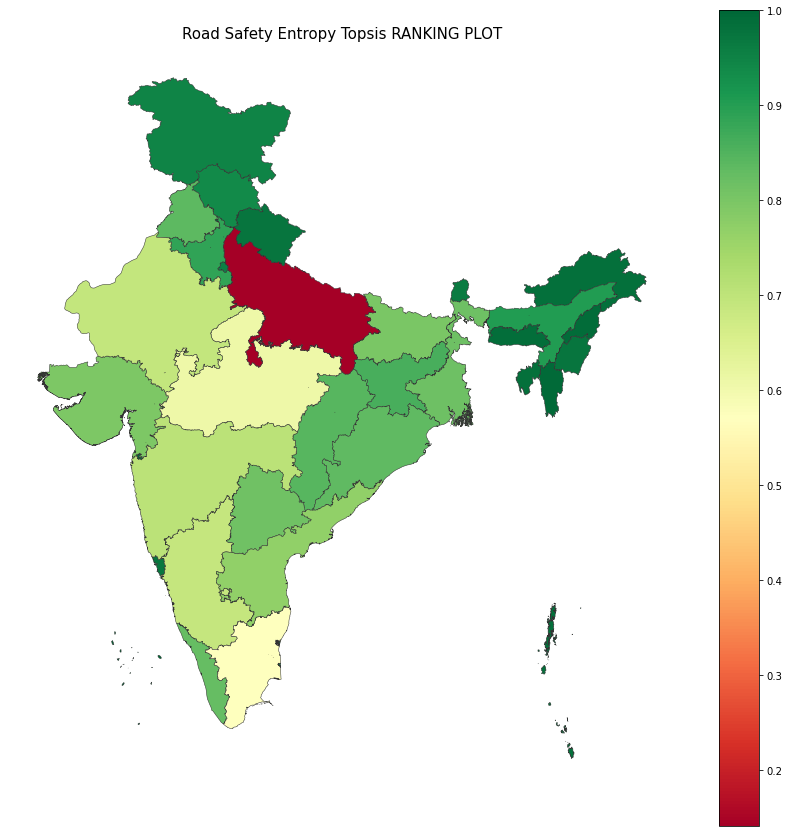

In [18]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.axis('off')
ax.set_title('Road Safety Entropy Topsis RANKING PLOT',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged_ET.plot(column='Score', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
plt.savefig(r"C:\Users\Praujjawal\Desktop\BTP I Materials\Actual Data\Entropy_Topsis_Plot.png", facecolor="w")